In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
#importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [55]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/Skyserver.csv')
print(df)


             objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598371   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22

In [56]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [57]:
#Checking the columns
df.shape

(10000, 18)

In [58]:
#checking the data types of the columns
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [59]:
#Cheking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [60]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [61]:
df.isnull().values.any()

False

In [62]:
#Checking for null values
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

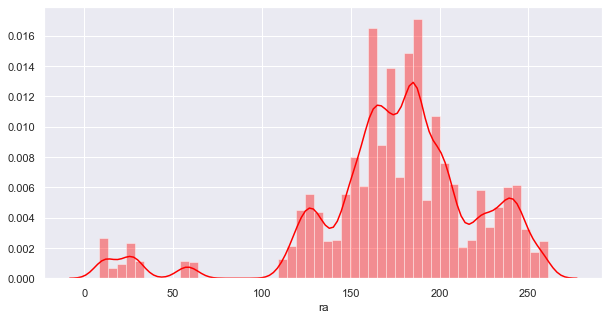

In [63]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['ra'],color='red')
plt.show()

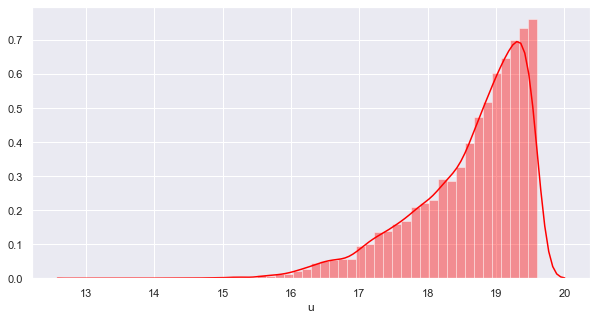

In [64]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['u'],color='red')
plt.show()

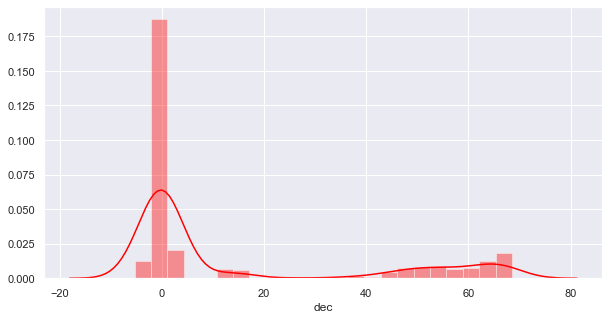

In [65]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['dec'],color='red')
plt.show()

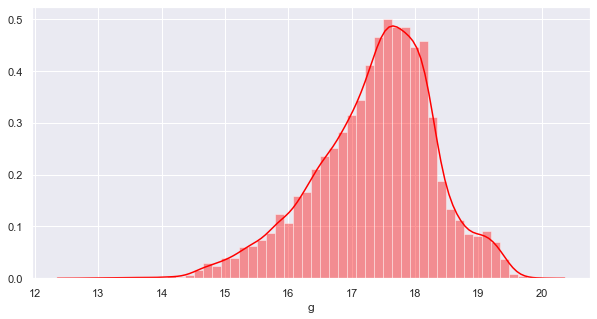

In [66]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['g'],color='red')
plt.show()

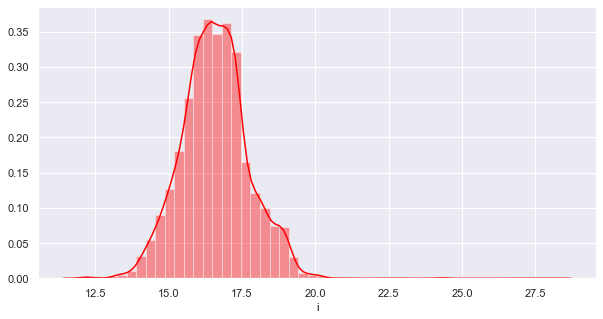

In [67]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['i'],color='red')
plt.show()

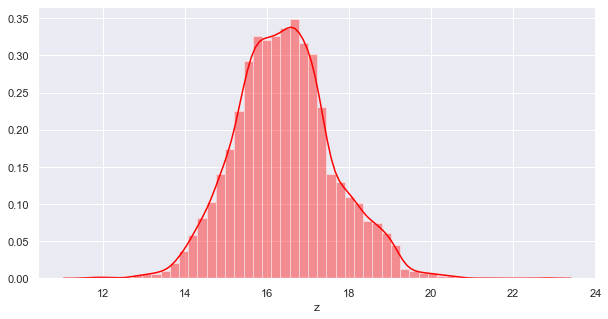

In [68]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['z'],color='red')
plt.show()

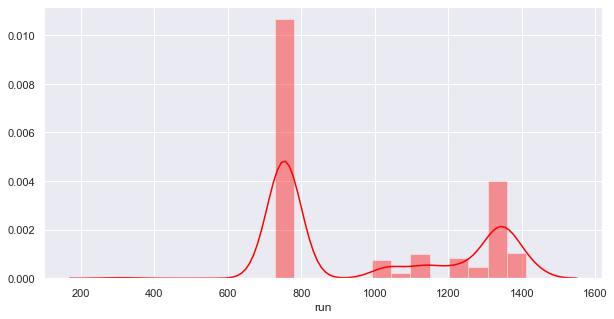

In [69]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['run'],color='red')
plt.show()

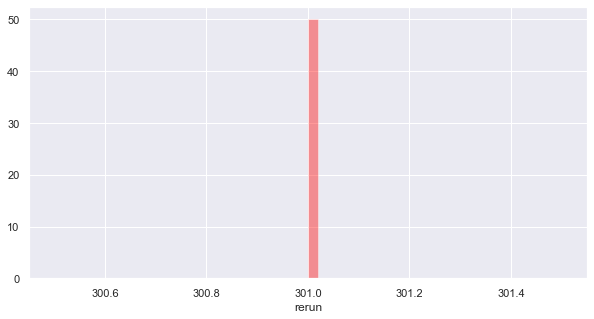

In [70]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['rerun'],color='red')
plt.show()

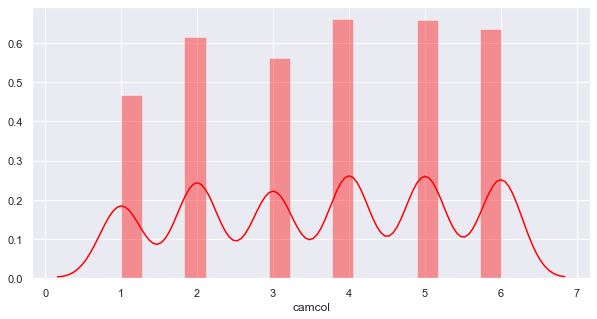

In [71]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['camcol'],color='red')
plt.show()

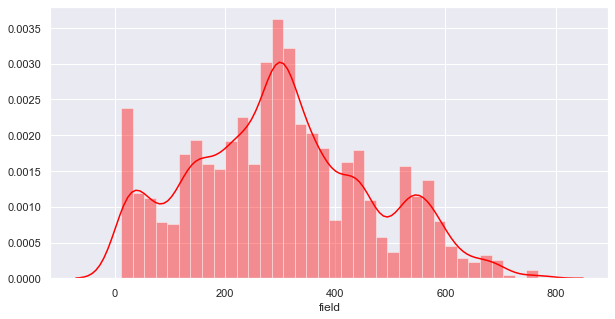

In [72]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['field'],color='red')
plt.show()

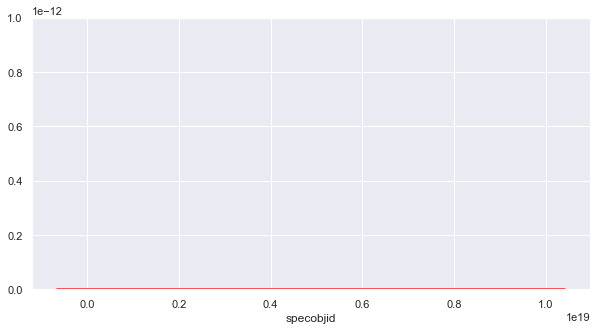

In [73]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['specobjid'],color='red')
plt.show()

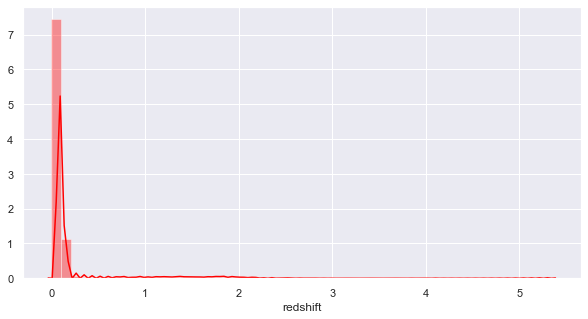

In [74]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['redshift'],color='red')
plt.show()

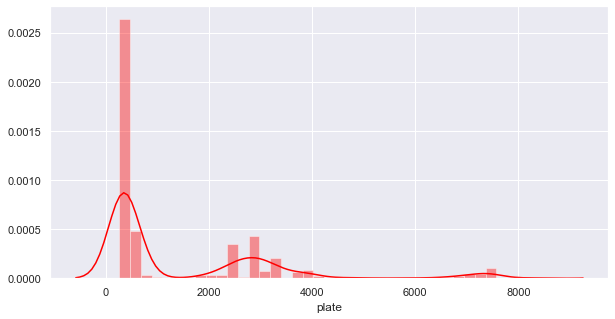

In [75]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['plate'],color='red')
plt.show()

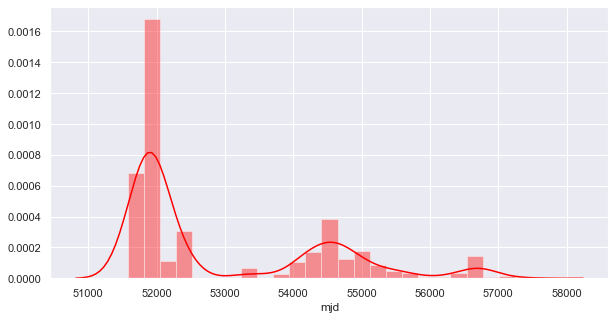

In [76]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['mjd'],color='red')
plt.show()

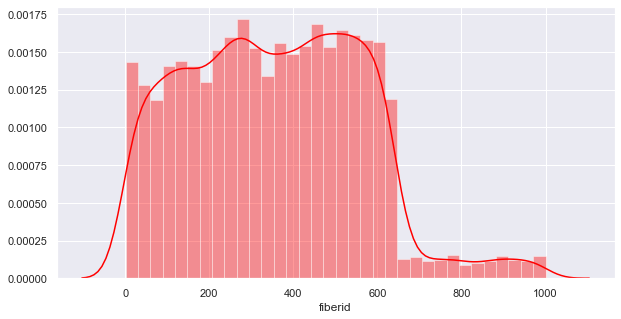

In [77]:
plt.figure(figsize=(10,5))
sn.set()
sn.distplot(df['fiberid'],color='red')
plt.show()

In [78]:
df=df.drop(['specobjid'],axis=1)

In [79]:
df.dtypes

objid       float64
ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
run           int64
rerun         int64
camcol        int64
field         int64
class        object
redshift    float64
plate         int64
mjd           int64
fiberid       int64
dtype: object

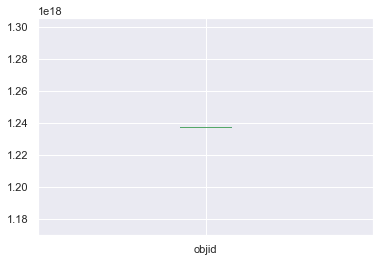

In [80]:
df['objid'].plot.box()
plt.show()

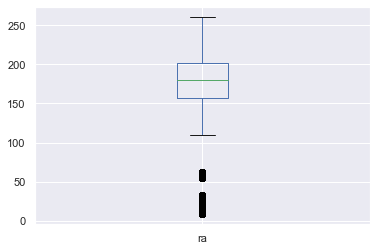

In [81]:
df['ra'].plot.box()
plt.show()

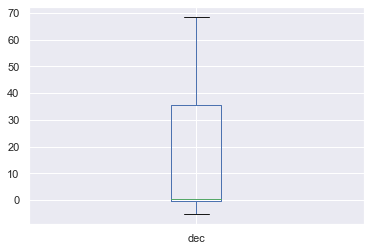

In [82]:
df['dec'].plot.box()
plt.show()

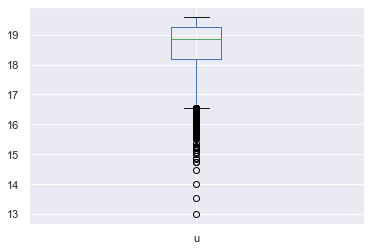

In [83]:
df['u'].plot.box()
plt.show()

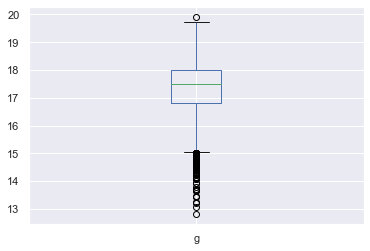

In [84]:
df['g'].plot.box()
plt.show()

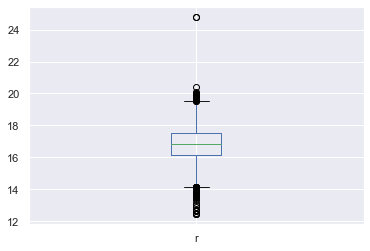

In [85]:
df['r'].plot.box()
plt.show()

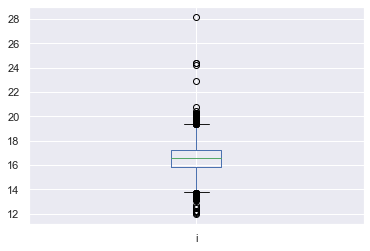

In [86]:
df['i'].plot.box()
plt.show()

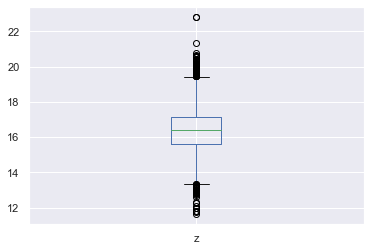

In [87]:
df['z'].plot.box()
plt.show()

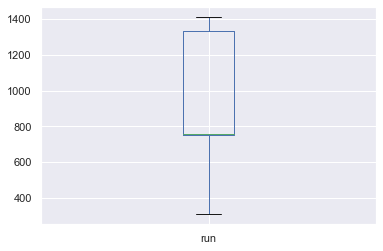

In [88]:
df['run'].plot.box()
plt.show()

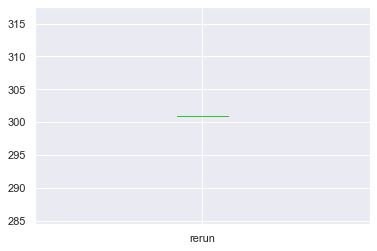

In [89]:
df['rerun'].plot.box()
plt.show()

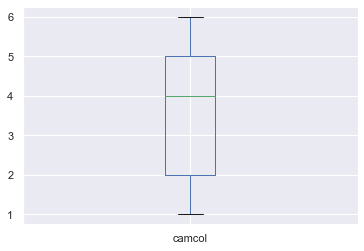

In [90]:
df['camcol'].plot.box()
plt.show()

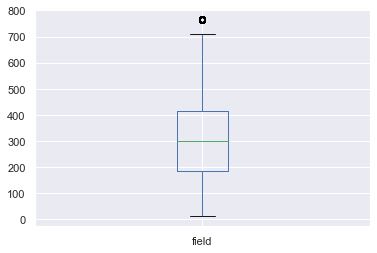

In [91]:
df['field'].plot.box()
plt.show()

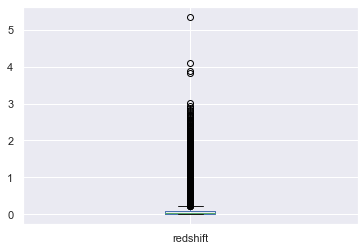

In [40]:
df['redshift'].plot.box()
plt.show()

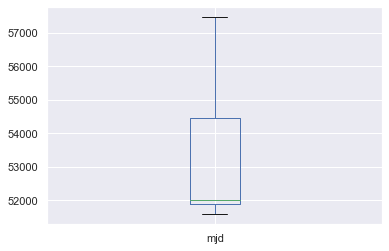

In [41]:
df['mjd'].plot.box()
plt.show()

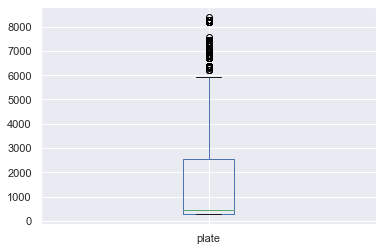

In [42]:
df['plate'].plot.box()
plt.show()

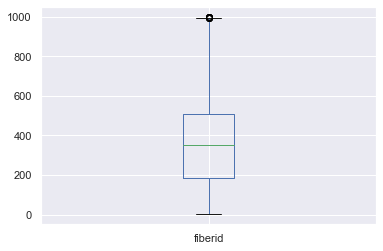

In [43]:
df['fiberid'].plot.box()
plt.show()

In [44]:
df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


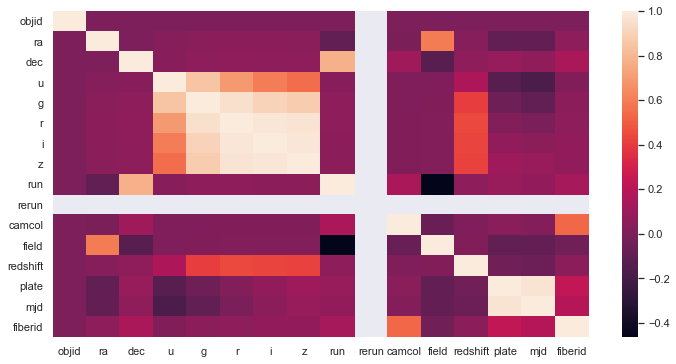

In [45]:
plt.figure(figsize=(12,6))
sn.heatmap(df.corr())
plt.show()

In [46]:
#x=df.drop(columns=['objid','ra','dec','run','field'])

In [47]:
#y=df['objid']

In [48]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[       nan, 0.16745842, 0.58492272, ..., 1.03148936, 1.30931064,
        0.66863177],
       [       nan, 0.16886159, 0.58311429, ..., 0.63621258, 0.87919741,
        0.91101156],
       [       nan, 0.17057433, 0.58347525, ..., 0.65633905, 0.60919097,
        0.77527888],
       ...,
       [       nan, 0.92039468, 1.46090664, ..., 3.26608697, 2.69309363,
        1.3036668 ],
       [       nan, 0.92197294, 1.46432109, ..., 0.56688806, 0.70581092,
        0.60143828],
       [       nan, 0.91804124, 1.46639319, ..., 0.56688806, 0.70581092,
        0.5820479 ]])

In [49]:
threshold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9992, 9994, 9997], dtype=int64), array([12, 12, 12, ..., 13, 13, 13], dtype=int64))


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier (n_estimators=10,criterion='entropy',random_state=0)

In [97]:
x=df.drop(columns=['objid','class'])
y=df['class']

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [99]:
x_train.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
7681,208.166066,63.942846,18.01177,17.01405,16.60518,16.43028,16.33818,1345,301,5,429,-0.000517,3295,54924,128
9031,135.253876,54.667382,17.37893,16.15292,15.59942,15.22217,14.94374,1345,301,4,187,0.046445,450,51908,290
3691,198.871470,-0.002357,17.73402,15.68315,14.84182,14.52720,14.35130,1334,301,3,15,-0.000369,2901,54652,596
202,122.981945,0.963857,17.63113,16.55926,16.24861,16.14775,16.13221,308,301,5,111,0.000132,2077,53846,328
5625,207.581526,0.332356,17.29023,16.20386,15.78211,15.60586,15.54368,1404,301,4,58,0.000316,300,51943,511


In [100]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [101]:
rf.score(x_train,y_train)

0.9987142857142857

In [102]:
pred=rf.predict(x_test)

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy_score(y_test,pred)

0.99

In [107]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

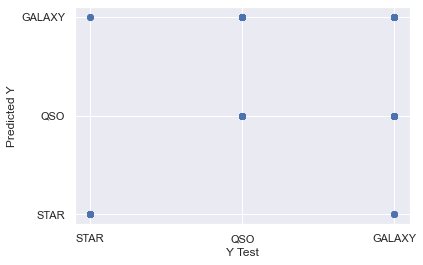

In [108]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')